In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 02:33:19 2015

@author: nymph
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




In [ ]:
############################## Your code for loading and preprocess the data ##
with open("household_power_consumption.txt") as f:
    data = f.read().split('\n')[:-1]
    data = list(map(lambda line: line.split(';'), data))
    columns = data[0]
    data = np.array(data[1:])
data

array([['16/12/2006', '17:24:00', '4.216', ..., '0.000', '1.000',
        '17.000'],
       ['16/12/2006', '17:25:00', '5.360', ..., '0.000', '1.000',
        '16.000'],
       ['16/12/2006', '17:26:00', '5.374', ..., '0.000', '2.000',
        '17.000'],
       ...,
       ['26/11/2010', '21:00:00', '0.938', ..., '0.000', '0.000',
        '0.000'],
       ['26/11/2010', '21:01:00', '0.934', ..., '0.000', '0.000',
        '0.000'],
       ['26/11/2010', '21:02:00', '0.932', ..., '0.000', '0.000',
        '0.000']], dtype='<U10')

In [ ]:
df = data[(data[:,0] == '1/2/2007') + (data[:,0] == '2/2/2007')]
df = pd.DataFrame(df, columns=columns)
df.to_csv("electric.csv")

In [3]:
df = pd.read_csv("electric.csv")
df = df.drop(df.columns[0], axis=1)
# df.Date = pd.to_datetime(df.Date)
# df.Time = pd.to_time(df.Time)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


In [7]:
############################ Complete the following 4 functions ###############
def plot1():
    plt.hist(df.Global_active_power, bins=np.arange(0, int(df.Global_active_power.max())+0.1, 0.5), edgecolor='black')
    plt.title("Global Active Power")
    plt.xlabel("Global Active Power (kilowatts)")
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.savefig('plot1.png')
    plt.show()

def plot2():
    plt.figure().set_figwidth(15)
    ti = pd.to_datetime(df.Date + ' ' + df.Time, dayfirst=True)
    plt.plot(ti.apply(lambda t: (t - ti[0]).total_seconds()/3600), df.Global_active_power)
    # plt.title("Global Active Power")
    plt.ylabel("Global Active Power (kilowatts)")
    plt.xlabel(f"Hour (from {ti[0]})")
    plt.xticks(ti.apply(lambda t: (t - ti[0]).total_seconds()/3600)[::60])
    plt.savefig('plot2.png')
    plt.show()

def plot3():
    plt.figure().set_figwidth(15)
    ti = pd.to_datetime(df.Date + ' ' + df.Time, dayfirst=True)
    h = ti.apply(lambda t: (t - ti[0]).total_seconds()/3600)
    for i in range(3):
        plt.plot(h, df[f"Sub_metering_{i+1}"], label=f"Sub_metering_{i+1}")
    plt.ylabel("Energy Sub Metering")
    plt.xlabel(f"Hour (from {ti[0]})")
    plt.legend()
    plt.xticks(ti.apply(lambda t: (t - ti[0]).total_seconds()/3600)[::60])
    plt.savefig('plot3.png')
    plt.show()

def plot4():
    plt.figure().set_figwidth(15)
    ti = pd.to_datetime(df.Date + ' ' + df.Time, dayfirst=True)
    plt.plot(ti.apply(lambda t: (t - ti[0]).total_seconds()/3600), df.Voltage)
    # plt.title("")
    plt.ylabel("Voltage")
    plt.xlabel(f"Hour (from {ti[0]})")
    plt.xticks(ti.apply(lambda t: (t - ti[0]).total_seconds()/3600)[::60])
    plt.savefig('plot4.png')
    plt.show()



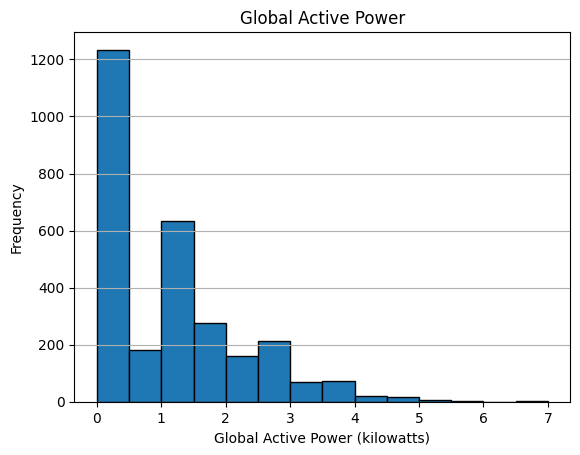

In [8]:
plot1()

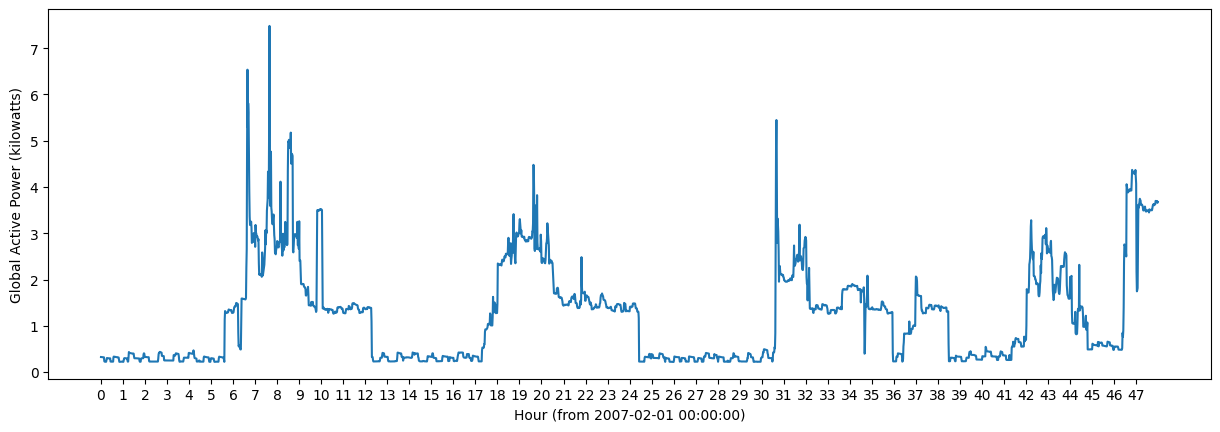

In [9]:
plot2()

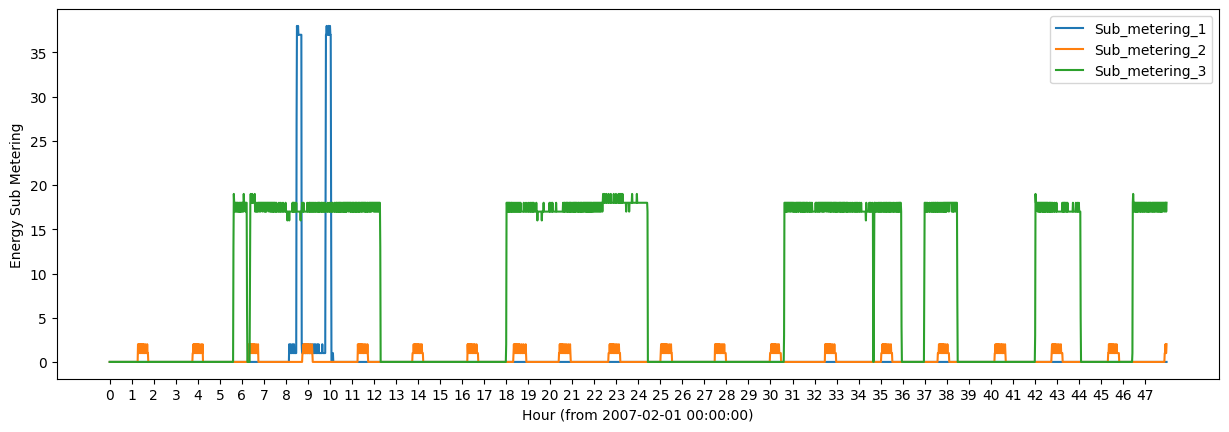

In [10]:
plot3()

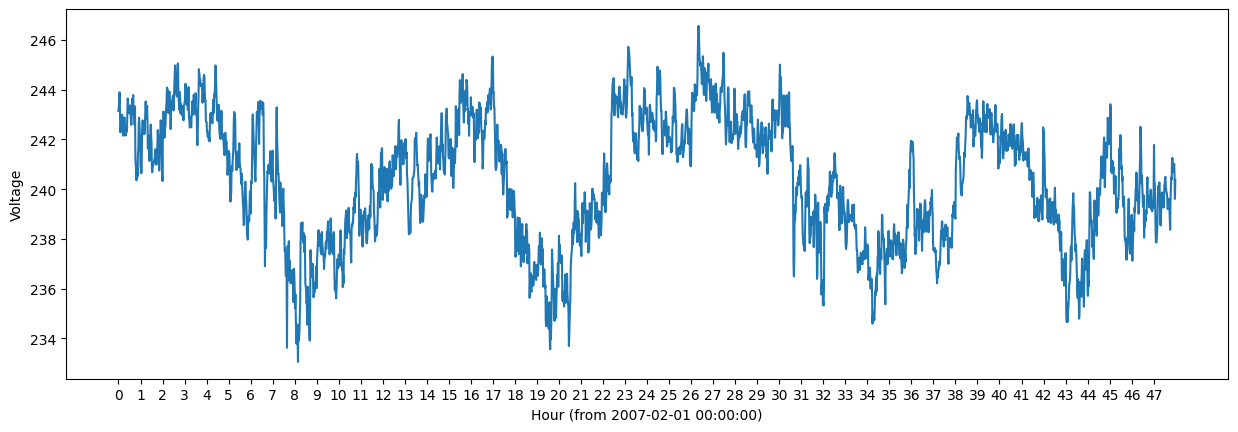

In [11]:
plot4()